In [20]:
import geopandas as gpd
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
gdf = gpd.read_file("../data/raw/municipalities/muni_boundary.gpkg")

In [4]:
gdf.columns

Index(['id.namespace', 'id.lokalId', 'status', 'geometristatus', 'virkningFra',
       'virkningTil', 'virkningsaktoer', 'forretningshaendelse',
       'registreringFra', 'registreringTil', 'registreringsaktoer',
       'forretningsomraade', 'forretningsproces', 'DAGIid', 'navn',
       'redigeringsret', 'dataspecifikation', 'landekode', 'skala',
       'udtraeksdato', 'kommunekode', 'LAU1vaerdi', 'udenforKommuneinddeling',
       'regionskode', 'regionsLokalId', 'region', 'geometry'],
      dtype='object')

In [5]:
with open("navn.txt", "w") as opened_file:
    for i in list(gdf.navn):
        opened_file.writelines(i+"\n")


In [39]:
gdf_plot.loc[0].geometry.centroid.x

673593.2411853243

**Make Faxe plot**

/var/folders/66/3jkth_7d5gggg6pyr8yywwt40000gn/T/ipykernel_97542/139024566.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_plot = gdf[gdf.intersects(gdf[gdf["navn"]=="Faxe"].geometry.explode()[83][0])].copy()


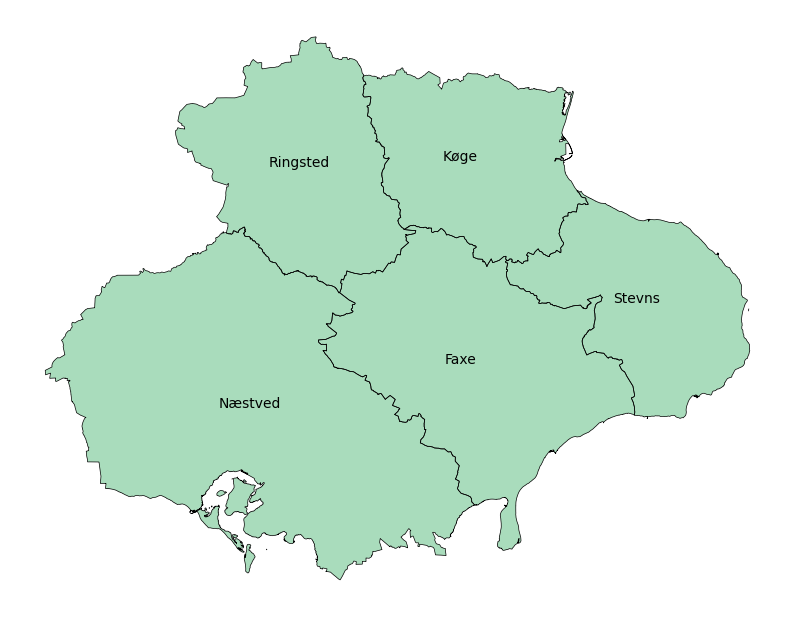

In [51]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

gdf_plot = gdf[gdf.intersects(gdf[gdf["navn"]=="Faxe"].geometry.explode()[83][0])].copy()
gdf_plot.plot(ax=ax, color = "#A9DCBC")
gdf_plot.boundary.plot(ax=ax, color = "black", lw = 0.5)
for i, row in gdf_plot.iterrows():
    ax.text(row.geometry.centroid.x-3000, row.geometry.centroid.y, row.navn)
ax.set_axis_off()
fig.savefig("faxe.png")

**Make Fyn plot**

In [46]:
fyn_muni = [
    "Middelfart",
    "Nordfyns",
    "Odense",
    "Kerteminde",
    "Assens",
    "Faaborg-Midtfyn",
    "Svendborg",
    "Ærø",
    "Langeland"
]

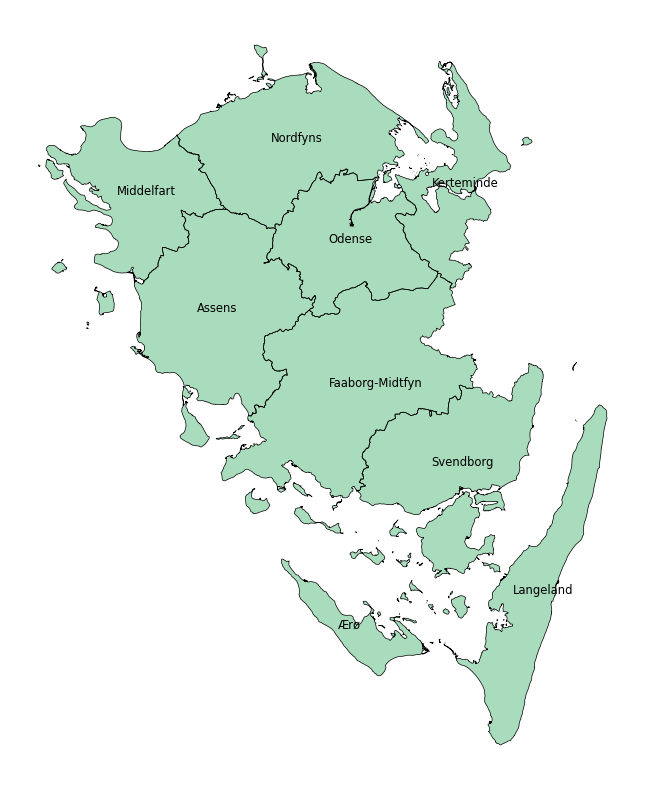

In [50]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

gdf_plot = gdf[gdf.navn.isin(fyn_muni)].copy()
gdf_plot.plot(ax=ax, color = "#A9DCBC")
gdf_plot.boundary.plot(ax=ax, color = "black", lw = 0.5)
for i, row in gdf_plot.iterrows():
    ax.text(row.geometry.centroid.x-3000, row.geometry.centroid.y, row.navn, fontsize = "small")
ax.set_axis_off()
fig.savefig("fyn.png")